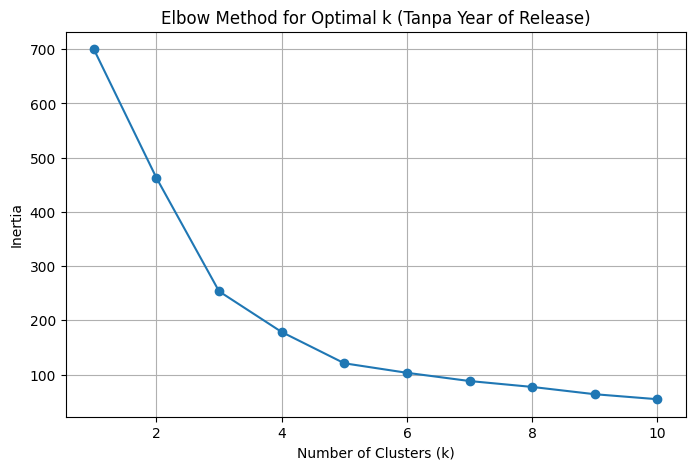

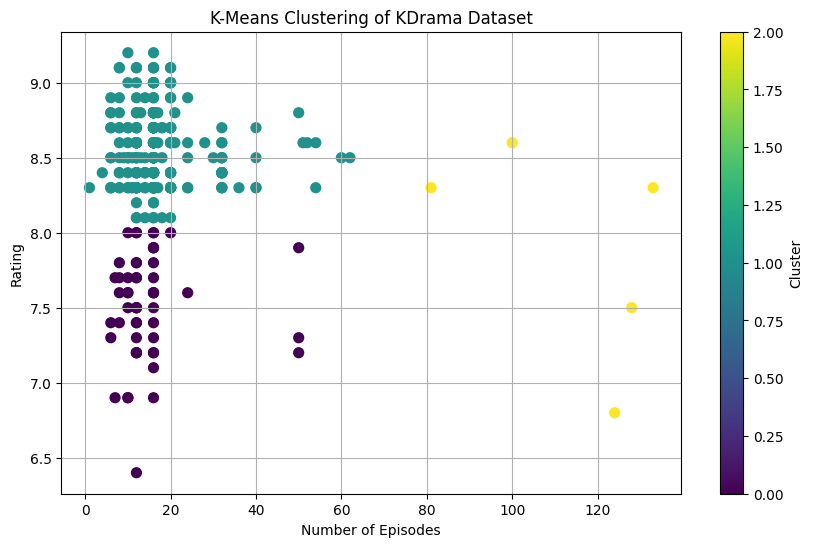

                                               Title  Number of Episodes  \
0                                       Yumi's Cells                  14   
1                                    Strangers Again                  12   
2                             Love Song for Illusion                  16   
3  Money Heist: Korea - Joint Economic Area - Part 1                   6   
4                                 All of Us Are Dead                  12   
5                                             Memory                  16   
6                        Joseon Attorney: A Morality                  16   
7                                             Jumong                  81   
8                              Divorce Attorney Shin                  12   
9                                     Age of Youth 2                  14   

   Rating  Cluster  
0     8.5        1  
1     7.2        0  
2     7.6        0  
3     8.3        1  
4     8.5        1  
5     8.3        1  
6     7.9       

In [1]:
# 1. Import library
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 2. Load dataset
df = pd.read_csv('kdrama_DATASET.csv')

# 3. Pilih fitur numerik
features = df[['Number of Episodes', 'Rating']]

# 4. Normalisasi data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 5. Menentukan jumlah cluster optimal dengan Elbow Method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# 6. Visualisasi Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k (Tanpa Year of Release)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# 7. Terapkan K-Means dengan jumlah cluster optimal
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_features)

# 8. Tambahkan hasil cluster ke dataset
df['Cluster'] = clusters

# Acak urutan data
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# 9. Visualisasi hasil clustering menggunakan matplotlib
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Number of Episodes'], df['Rating'], c=df['Cluster'], cmap='viridis', s=50)
plt.title('K-Means Clustering of KDrama Dataset')
plt.xlabel('Number of Episodes')
plt.ylabel('Rating')
plt.colorbar(scatter, label='Cluster')
plt.grid()
plt.show()

# 10. Menampilkan hasil cluster
print(df[['Title', 'Number of Episodes', 'Rating', 'Cluster']].head(10))
